# Calculating LTS and EIS with `eurec4a-environment`

This notebook demonstrates how to calculate the *lower-tropospheric stability* (LTS) and *estimated inversion strength* (EIS) as defined by [Klein & Hartmann 1993](https://www.jstor.org/stable/26198436) and [Wood & Bretherton 2006](https://doi.org/10.1175/JCLI3988.1) respectively.

In [1]:
import eurec4a_environment.source_data
import eurec4a_environment
from eurec4a_environment.variables import tropical as tropical_variables
from eurec4a_environment.variables import boundary_layer as bl_variables

import xarray as xr

%matplotlib inline
eurec4a_environment.__version__

'v0.0.1+18.gb06004c.dirty'

In [2]:
cat = eurec4a_environment.source_data.get_intake_catalog()
list(cat)

['radiosondes', 'barbados', 'HALO', 'P3', 'swifts', 'dropsondes']

In [3]:
ds_bco = cat.radiosondes.bco.to_dask()
ds_bco = ds_bco.swap_dims(dict(sounding="launch_time"))

In [4]:
ds_bco.launch_time

<xarray.DataArray 'launch_time' (launch_time: 344)>
array(['2020-01-16T20:54:18.520018944', '2020-01-16T22:48:45.823005952',
       '2020-01-17T00:17:59.640706048', ..., '2020-02-17T08:07:04.807088128',
       '2020-02-17T10:52:31.527008000', '2020-02-17T12:17:24.957107968'],
      dtype='datetime64[ns]')
Coordinates:
  * launch_time  (launch_time) datetime64[ns] 2020-01-16T20:54:18.520018944 ....
    sounding_id  (launch_time) |S1000 dask.array<chunksize=(172,), meta=np.ndarray>
Attributes:
    long_name:  time at which the sounding started

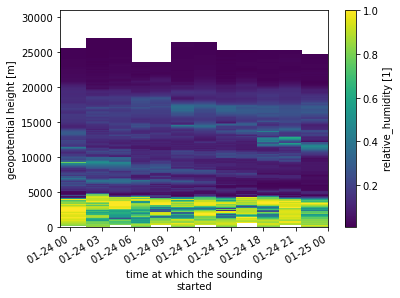

In [5]:
ds_ = ds_bco.sel(launch_time=slice("2020-01-24T00:00", "2020-01-25T00:00"))
ds_.rh.plot(y="alt")

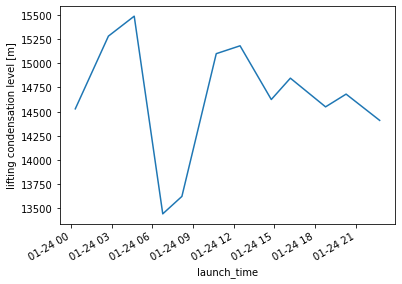

In [6]:
bl_variables.lcl.find_LCL_Bolton(ds=ds_).plot()

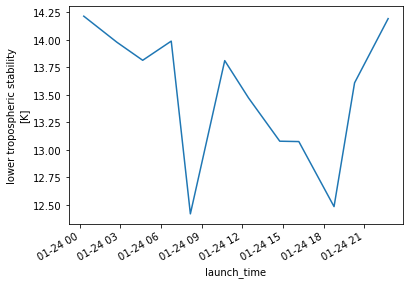

In [7]:
tropical_variables.lower_tropospheric_stability(ds=ds_).plot()

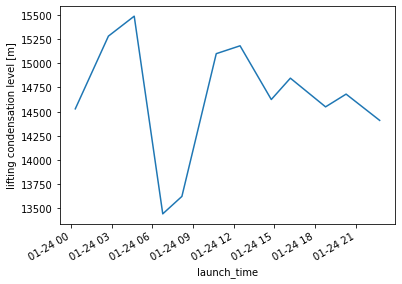

In [8]:
bl_variables.lcl.find_LCL_Bolton(ds=ds_).plot()

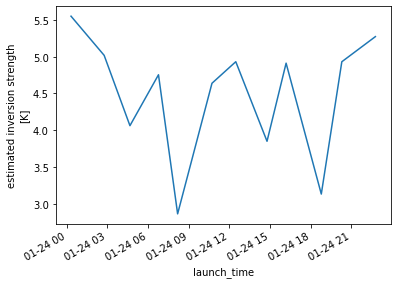

In [9]:
# LCL height as estimated with Bolton method is unreasonably high, 
# probably because boundary layer is poorly resolved in radiosondes. 
# Use fixed height of 700m as a guess for now
ds_["z_LCL"] = 700*xr.ones_like(ds_.launch_time, dtype=float)
ds_["z_LCL"].attrs['units'] = "m"

da_LTS = tropical_variables.lower_tropospheric_stability(ds=ds_)
ds_["dtheta_LTS"] = da_LTS

tropical_variables.estimated_inversion_strength(ds=ds_, LCL="z_LCL", LTS="dtheta_LTS").plot()